# Прогноз колличества заболевших коронавирусом


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import seaborn as sns
import sklearn
from sklearn import preprocessing
from sklearn.utils import shuffle
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

!pip install geopandas
import geopandas
from shapely.geometry import Point
import math

     |████████████████████████████████| 972kB 9.1MB/s 
     |████████████████████████████████| 10.9MB 34.5MB/s 
     |████████████████████████████████| 14.8MB 314kB/s 


In [2]:
# Загрузим наш датасет со статистикой 
dataset = pd.read_csv('https://raw.githubusercontent.com/WolfusFlow/Data-Science/master/coronavirus_data_Feb01.csv', delimiter=',', parse_dates=['Last Update']) #index_col=False
dataset_1 = pd.read_csv('https://raw.githubusercontent.com/WolfusFlow/Data-Science/master/coronavirus_statistic_2020-01-31.csv', delimiter=',')

In [3]:
#Отобразим его
dataframe = pd.DataFrame(dataset_1)
dataframe.info()
print(dataframe.describe())
dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435 entries, 0 to 434
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  435 non-null    int64  
 1   confirmed   424 non-null    float64
 2   country     435 non-null    object 
 3   date        435 non-null    object 
 4   deaths      384 non-null    float64
 5   province    349 non-null    object 
 6   recovered   430 non-null    float64
dtypes: float64(3), int64(1), object(3)
memory usage: 23.9+ KB
       Unnamed: 0    confirmed      deaths   recovered
count  435.000000   424.000000  384.000000  430.000000
mean    24.110345    82.667453    2.041667    1.469767
std     14.712820   429.513211   16.238218    8.988870
min      0.000000     0.000000    0.000000    0.000000
25%     12.000000     2.000000    0.000000    0.000000
50%     24.000000     7.000000    0.000000    0.000000
75%     36.000000    39.000000    0.000000    0.000000
max     58.000000  5806.

,Unnamed: 0,confirmed,country,date,deaths,province,recovered
0,37,1.0,South Korea,2020-01-22,0.0,NaN,0.0
1,15,0.0,China,2020-01-22,0.0,Inner Mongolia,0.0
2,14,4.0,China,2020-01-22,0.0,Hunan,0.0
3,13,444.0,China,2020-01-22,0.0,Hubei,0.0
4,12,NaN,China,2020-01-22,0.0,Hong Kong,0.0
...,...,...,...,...,...,...,...
430,33,1.0,Mainland China,2020-01-30,0.0,Tibet,0.0
431,32,7.0,Macau,2020-01-30,0.0,Macau,0.0
432,31,8.0,Mainland China,2020-01-30,0.0,Qinghai,0.0
433,29,12.0,Hong Kong,2020-01-30,0.0,Hong Kong,0.0


In [4]:
dataframe1 = pd.DataFrame(dataset_1)
dataframe1.info()
print(dataframe1.describe())
dataframe1

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435 entries, 0 to 434
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  435 non-null    int64  
 1   confirmed   424 non-null    float64
 2   country     435 non-null    object 
 3   date        435 non-null    object 
 4   deaths      384 non-null    float64
 5   province    349 non-null    object 
 6   recovered   430 non-null    float64
dtypes: float64(3), int64(1), object(3)
memory usage: 23.9+ KB
       Unnamed: 0    confirmed      deaths   recovered
count  435.000000   424.000000  384.000000  430.000000
mean    24.110345    82.667453    2.041667    1.469767
std     14.712820   429.513211   16.238218    8.988870
min      0.000000     0.000000    0.000000    0.000000
25%     12.000000     2.000000    0.000000    0.000000
50%     24.000000     7.000000    0.000000    0.000000
75%     36.000000    39.000000    0.000000    0.000000
max     58.000000  5806.

,Unnamed: 0,confirmed,country,date,deaths,province,recovered
0,37,1.0,South Korea,2020-01-22,0.0,NaN,0.0
1,15,0.0,China,2020-01-22,0.0,Inner Mongolia,0.0
2,14,4.0,China,2020-01-22,0.0,Hunan,0.0
3,13,444.0,China,2020-01-22,0.0,Hubei,0.0
4,12,NaN,China,2020-01-22,0.0,Hong Kong,0.0
...,...,...,...,...,...,...,...
430,33,1.0,Mainland China,2020-01-30,0.0,Tibet,0.0
431,32,7.0,Macau,2020-01-30,0.0,Macau,0.0
432,31,8.0,Mainland China,2020-01-30,0.0,Qinghai,0.0
433,29,12.0,Hong Kong,2020-01-30,0.0,Hong Kong,0.0


In [5]:
# Сгруппируем по стране/региону, где подтверждены случаи заражения Это для первого датасета
cases_by_country = dataframe.groupby(['province'])['confirmed'].sum().to_frame(name = 'Confirmed').reset_index()
cases_by_country.columns = ['province','confirmed']
cases_by_country.sort_values(by='confirmed', ascending=False, inplace=True)
cases_by_country.head()

,province,confirmed
18,Hubei,20572.0
44,Zhejiang,1746.0
10,Guangdong,1451.0
16,Henan,1234.0
19,Hunan,1136.0


In [6]:
cases_by_country = dataframe.groupby(['country'])['confirmed'].sum().to_frame(name = 'confirmed').reset_index()
cases_by_country.columns = ['country','confirmed']
cases_by_country.sort_values(by='confirmed', ascending=False, inplace=True)
cases_by_country.head()

,country,confirmed
15,Mainland China,33986.0
4,China,549.0
24,Thailand,75.0
9,Hong Kong,55.0
13,Japan,44.0


In [ ]:
# Перемешаем данные
# dataframe = shuffle(dataframe)
# dataframe

Text(0.5, 1.0, 'Confirmed Infection')

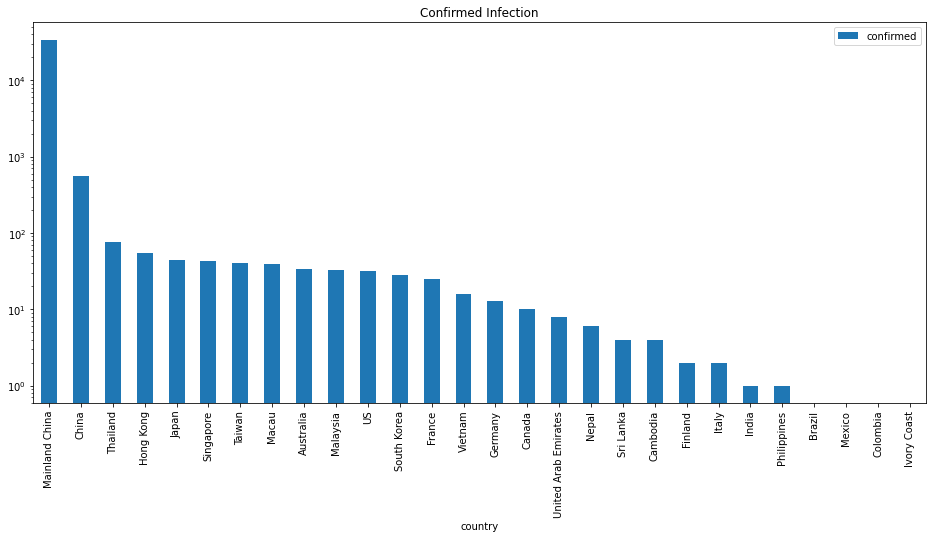

In [7]:
# Отобразим как график заражённых

# Что будем использовать на графике в качестве имени
def location_label(row):
    if pd.isnull(row['Province/State']):
        return row['Country/Region']
    else:
        return row['Province/State']

# Построим график
ax = cases_by_country.plot.bar(x='country', y='confirmed', figsize=(16, 7))
ax.set_yscale('log') # используем логарифмирование для лучшего отображения
ax.set_title('Confirmed Infection')

# Данный раздел с визуализацией на карте находится в разработке

In [ ]:
# Взять данные с сайта https://www.naturalearthdata.com/ и адаптировать для отображения на карте
world_lines = geopandas.read_file('zip://./shapefiles/ne_50m_admin_0_countries.zip')
world = world_lines[(world_lines['POP_EST']>0) & (world_lines['ADMIN']!='Antarctica')]
world = world.rename(columns = {'ADMIN':'name'})

In [ ]:
world_ncov = world.merge(jan25_12pm, left_on='name', right_on='Country/Region')
# Корректировки отображения график
w_ax = world.plot(color = "whitesmoke", edgecolor = "lightgrey", linewidth = 0.5, figsize=(18, 8));
world_ncov.plot(ax=w_ax, column='Confirmed', cmap='OrRd', edgecolor = "lightgrey", linewidth = 0.5, figsize=(18, 8));

In [ ]:
cols = ['name','Confirmed','geometry'] 
ncov = pd.concat([world_ncov[cols],us_state_ncov[cols],china_provinces_ncov[cols],china_cities_ncov[cols]],ignore_index=True)

ncov['log_confirmed'] = ncov.apply(lambda x: math.log10(x['Confirmed']), axis=1)
ncov[['name','Confirmed','log_confirmed']].sort_values(by='log_confirmed', ascending=False).head()

In [ ]:
# Посмтроение графика
ax = world.plot(
    color = "lightslategray", 
    edgecolor = "slategray", 
    linewidth = 0.5, figsize=(18, 6));
ax.set_facecolor("slategray")
ax.set_clip_on(False)
#ax.axis('off')

ncov.plot(
    ax=ax, 
    column='Confirmed', 
    norm=colors.LogNorm(vmin=1, vmax=1000),
    legend=True,
    legend_kwds={'label': "Confirmed 2019-nCoV Cases"},
    cmap='OrRd')

In [ ]:
world = geopandas.read_file(
    geopandas.datasets.get_path('naturalearth_lowres')
)

def plot_world(world):  
    # Remove antartica
    world = world[(world.name!="Antarctica")]
#     world = world.to_crs({'init': 'epsg:3395'})
    
    fig, ax = plt.subplots(figsize=(20,20)) # Set Size
    
    ax.set_title("World Map View");
    ax.axis(False) # Turn off axis
    
    world.plot(ax=ax, cmap='Reds')

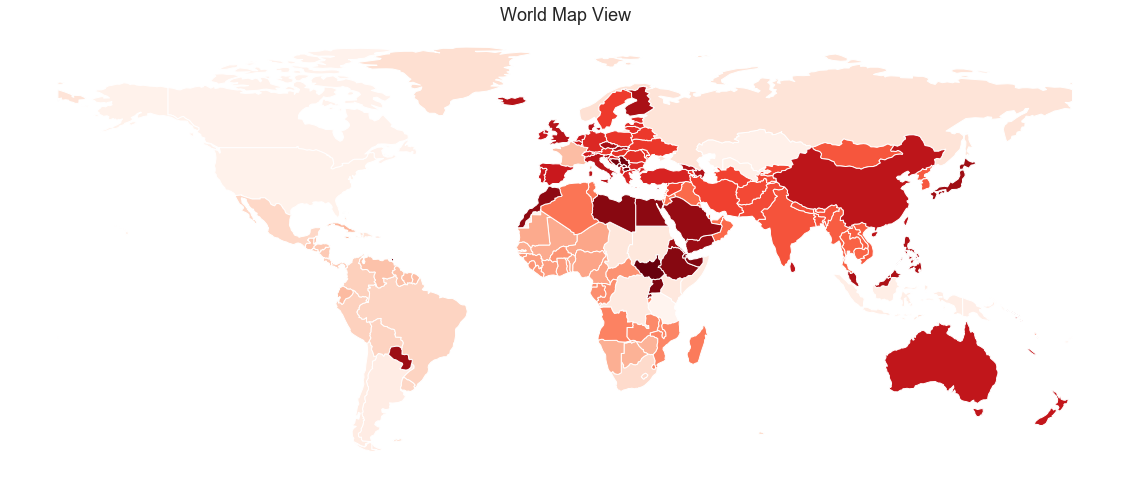

In [ ]:
plot_world(world)

# Препроцессинг

In [8]:
from sklearn import preprocessing

df = dataframe.copy()
# df.dropna()
print(df.dtypes)

le = preprocessing.LabelEncoder()
# df[['Province/State']] = le.fit_transform(df['Province/State'].astype(str))
# df[['Country/Region']] = le.fit_transform(df['Country/Region'].astype(str))
# df = df.drop(columns='Last Update')
# df = df.dropna()
df[['province']] = le.fit_transform(df['province'].astype(str))
df[['country']]  = le.fit_transform(df['country'].astype(str))
df[['date']]     = le.fit_transform(df['date'].astype(str))
df = df.dropna()
df = pd.get_dummies(df, prefix='', prefix_sep='')

# First 15 rows of our dataset.
print(dataframe.head(15))

def number_encode_features(init_df):
    result = init_df.copy() # копируем нашу исходную таблицу
    encoders = {}
    for column in result.columns:
        if result.dtypes[column] == np.object: # np.object -- строковый тип / если тип столбца - строка, то нужно его закодировать
            encoders[column] = preprocessing.LabelEncoder() # для колонки column создаем кодировщик
            result[column] = encoders[column].fit_transform(result[column]) # применяем кодировщик к столбцу и перезаписываем столбец
    return result, encoders

encoded_dataframe, encoders = number_encode_features(df) # Теперь encoded data содержит закодированные кат. признаки 
encoded_dataframe.head() 

Unnamed: 0      int64
confirmed     float64
country        object
date           object
deaths        float64
province       object
recovered     float64
dtype: object
    Unnamed: 0  confirmed      country  ... deaths        province recovered
0           37        1.0  South Korea  ...    0.0             NaN       0.0
1           15        0.0        China  ...    0.0  Inner Mongolia       0.0
2           14        4.0        China  ...    0.0           Hunan       0.0
3           13      444.0        China  ...    0.0           Hubei       0.0
4           12        NaN        China  ...    0.0       Hong Kong       0.0
5           11        5.0        China  ...    0.0           Henan       0.0
6           10        NaN        China  ...    0.0    Heilongjiang       0.0
7            9        1.0        China  ...    0.0           Hebei       0.0
8           16        1.0        China  ...    0.0         Jiangsu       0.0
9            8        4.0        China  ...    0.0          Ha

,Unnamed: 0,confirmed,country,date,deaths,province,recovered
0,37,1.0,21,0,0.0,45,0.0
1,15,0.0,4,0,0.0,21,0.0
2,14,4.0,4,0,0.0,19,0.0
3,13,444.0,4,0,0.0,18,0.0
5,11,5.0,4,0,0.0,16,0.0


In [9]:
encoded_dataframe.describe()

,Unnamed: 0,confirmed,country,date,deaths,province,recovered
count,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000
mean,25.059783,78.252717,14.445652,4.146739,2.116848,27.163043,1.380435
std,14.545118,458.555817,6.336373,2.540182,16.584026,14.363348,9.674926
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13.000000,2.000000,15.000000,2.000000,0.000000,15.000000,0.000000
50%,25.000000,5.000000,15.000000,4.000000,0.000000,28.000000,0.000000
75%,36.000000,26.000000,15.000000,6.000000,0.000000,41.250000,0.000000
max,58.000000,5806.000000,27.000000,8.000000,204.000000,45.000000,116.000000


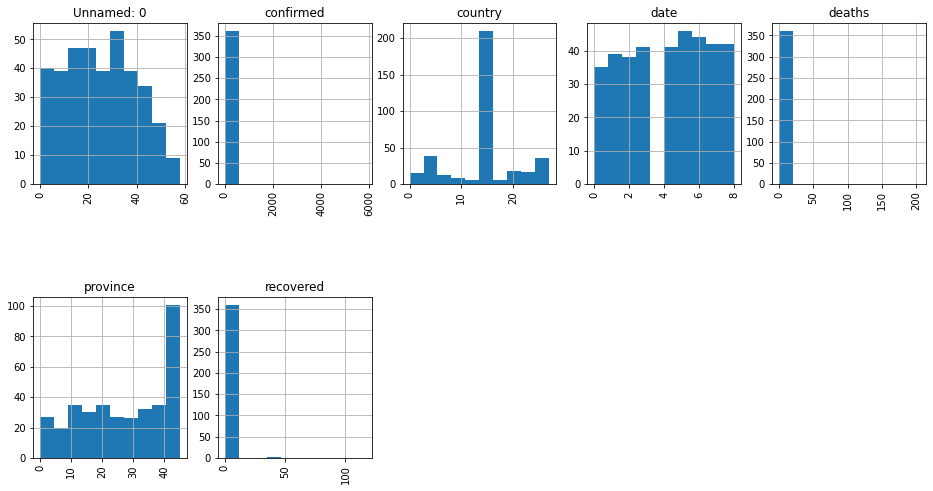

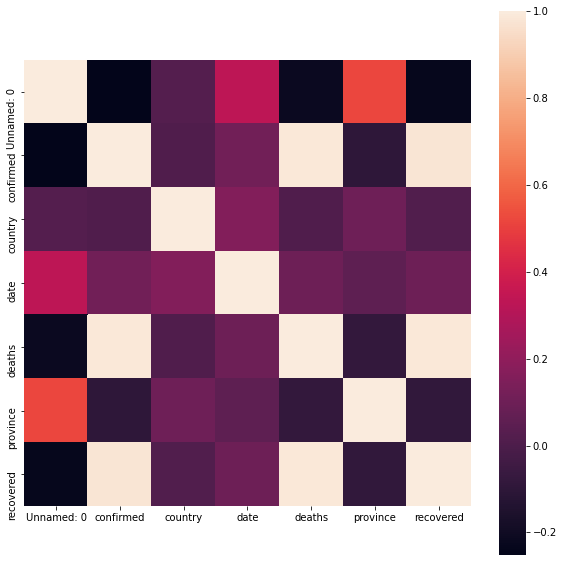

In [10]:
# Построим графики что бы увидеть распределение величин
fig = plt.figure(figsize=(16,8))
cols = 5

rows = np.ceil(float(encoded_dataframe.shape[1]) / cols)
for i, column in enumerate(encoded_dataframe.columns):
    ax = fig.add_subplot(rows, cols, i + 1)
    ax.set_title(column)
    encoded_dataframe[column].hist(axes=ax)
    plt.xticks(rotation="vertical")
plt.subplots_adjust(hspace=0.7, wspace=0.2)

# Посмотрим, какие присутствуют корреляции
def show_heat_map(dataframe):
  plt.subplots(figsize=(10,10))
  sns.heatmap(dataframe.corr(), square=True)
  plt.show()

show_heat_map(encoded_dataframe)

In [11]:
# Выделим целвую переменную
y = encoded_dataframe['confirmed'].values
print(y)

encoded_dataframe.drop(['confirmed'], axis=1, inplace = True)

[1.000e+00 0.000e+00 4.000e+00 4.440e+02 5.000e+00 1.000e+00 1.000e+00
 4.000e+00 2.000e+00 2.600e+01 0.000e+00 1.000e+00 6.000e+00 1.400e+01
 1.000e+00 1.000e+00 2.000e+00 2.000e+00 2.000e+00 2.000e+00 1.000e+01
 1.000e+00 1.000e+00 0.000e+00 4.000e+00 1.000e+00 0.000e+00 1.000e+00
 9.000e+00 2.000e+00 0.000e+00 0.000e+00 1.000e+00 1.000e+00 5.000e+00
 2.000e+00 4.440e+02 9.000e+00 3.000e+00 7.000e+00 1.000e+00 5.000e+00
 5.000e+00 2.000e+00 2.200e+01 5.000e+00 3.000e+00 5.000e+00 3.200e+01
 2.000e+00 5.000e+00 9.000e+00 2.000e+00 9.000e+00 1.000e+00 0.000e+00
 1.000e+00 3.000e+00 2.000e+00 1.000e+00 3.000e+00 1.000e+00 1.000e+00
 2.000e+00 6.000e+00 2.700e+01 1.000e+00 8.000e+00 1.000e+00 1.600e+01
 0.000e+00 1.000e+00 2.000e+00 4.000e+00 1.500e+01 5.000e+00 5.000e+00
 8.000e+00 9.000e+00 9.000e+00 1.000e+01 1.500e+01 1.800e+01 2.000e+01
 2.300e+01 2.700e+01 3.600e+01 4.300e+01 5.300e+01 5.490e+02 1.500e+01
 4.000e+00 2.400e+01 3.000e+00 3.000e+00 2.000e+00 2.000e+00 3.000e+00
 2.000

In [12]:
X = encoded_dataframe.values.astype(np.float)
print(X, '\n')

sc = sklearn.preprocessing.StandardScaler()
X = sc.fit_transform(X)
X

[[ 37.  21.   0.   0.  45.   0.]
 [ 15.   4.   0.   0.  21.   0.]
 [ 14.   4.   0.   0.  19.   0.]
 ...
 [ 31.  15.   8.   0.  30.   0.]
 [ 29.   9.   8.   0.  17.   0.]
 [  0.  15.   8. 204.  18. 116.]] 



array([[ 0.8220266 ,  1.03580882, -1.63468018, -0.12781757,  1.24352908,
        -0.14287595],
       [-0.6925677 , -1.65076663, -1.63468018, -0.12781757, -0.42966544,
        -0.14287595],
       [-0.7614129 , -1.65076663, -1.63468018, -0.12781757, -0.56909832,
        -0.14287595],
       ...,
       [ 0.40895543,  0.08760572,  1.51898853, -0.12781757,  0.1977825 ,
        -0.14287595],
       [ 0.27126504, -0.86059738,  1.51898853, -0.12781757, -0.70853119,
        -0.14287595],
       [-1.72524563,  0.08760572,  1.51898853, 12.18992389, -0.63881475,
        11.8632035 ]])

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=0)
print(X_train)
print(y_train)
print('\n', X_test)
print(y_test)

[[ 1.30394297  0.56170727  1.12477994 -0.12781757  1.24352908 -0.14287595]
 [ 0.40895543 -0.07042813  0.73057135 -0.12781757 -0.08108325 -0.14287595]
 [-0.34834172 -1.65076663 -1.63468018 -0.12781757 -0.08108325 -0.14287595]
 ...
 [-0.7614129   0.08760572 -0.45205442 -0.12781757 -0.98739694 -0.14287595]
 [-1.31217446  0.08760572 -1.24047159 -0.12781757 -1.12682982 -0.14287595]
 [ 0.13357465  0.08760572 -0.05784583 -0.12781757 -0.22051612 -0.14287595]]
[1.000e+00 7.000e+00 1.000e+00 1.000e+00 5.000e+00 5.806e+03 3.000e+00
 2.700e+01 8.000e+01 1.000e+00 5.300e+01 2.000e+00 4.000e+00 1.280e+02
 3.000e+00 3.000e+00 1.000e+00 3.000e+00 4.000e+00 3.000e+00 2.000e+00
 1.100e+02 9.000e+00 2.000e+00 2.770e+02 8.200e+01 1.400e+01 1.000e+00
 1.000e+00 6.000e+00 1.000e+00 1.800e+01 1.400e+01 3.000e+00 8.000e+00
 1.000e+01 8.000e+01 1.520e+02 2.000e+00 1.000e+00 1.900e+01 5.000e+00
 5.000e+00 2.200e+01 0.000e+00 1.040e+02 3.000e+00 2.000e+00 1.000e+02
 1.000e+00 3.000e+00 2.000e+00 1.000e+00 9.000e

# Построим логистическую регрессию с использованием данных для обучения

In [14]:
# Импортируем библиотеки
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

print(X_train.shape)
print(y_train.shape)
# X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.3, random_state=0)

# Создадим экземпляр класса логистической регрессии и передадим в него обучающие выборки
logreg = LogisticRegression()
logreg.fit(X_train, y_train)


(239, 6)
(239,)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [15]:
y_pred = logreg.predict(X_test) 
print('Точность классификатора логистической регрессии на test set: {:.2f}'.format(logreg.score(X_test, y_test)))

#Построим confusion matrix что бы увидеть точность по TP TN FP FN
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix, '\n')

# Выведем метрики нашего классификатора
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

Точность классификатора логистической регрессии на test set: 0.16
[[ 1  2  0 ...  0  0  0]
 [ 1 17  0 ...  0  0  0]
 [ 0 14  0 ...  0  0  0]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  1]
 [ 0  0  0 ...  0  0  0]] 

              precision    recall  f1-score   support

         0.0       0.50      0.33      0.40         3
         1.0       0.21      0.77      0.33        22
         2.0       0.00      0.00      0.00        16
         3.0       0.00      0.00      0.00         5
         4.0       0.00      0.00      0.00        10
         5.0       0.08      0.40      0.13         5
         6.0       0.00      0.00      0.00         6
         7.0       0.00      0.00      0.00         5
         8.0       0.00      0.00      0.00         2
         9.0       0.00      0.00      0.00         4
        10.0       0.00      0.00      0.00         1
        11.0       0.00      0.00      0.00         2
        12.0       0.00      0.00      0.00         2
        13.0       

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


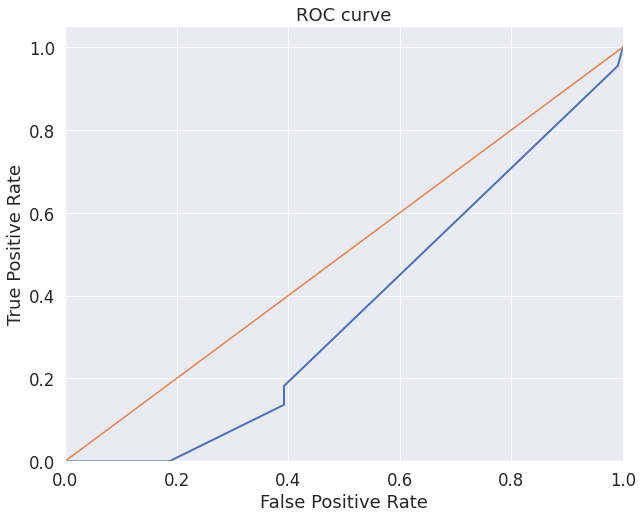

In [16]:
# Построим ROC кроивую для оценки модели в целом
sns.set(font_scale=1.5)
sns.set_color_codes("muted")

plt.figure(figsize=(10, 8))
# Передадим целевой столбец ответом и результат классификатора
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred, pos_label=1)
lw = 2

# Зададим параметры отображения
plt.plot(fpr, tpr, lw=lw, label='ROC curve ')
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.savefig("ROC.png")
plt.show()

# Добавим кросс валидацию для лог регрессии

### Требуются доработки в плане ReShapeing-а или поиск другого решения

In [ ]:
from sklearn.linear_model import LogisticRegressionCV

# Всё равно, даже после препроцессинга получаю сообщение с просьбой увеличения
# итераций хотя из уже 210 или с предложениями препроцессинга. 
# Increase the number of iterations (max_iter) or scale the data

from sklearn import preprocessing
X_scaled = preprocessing.scale(X_train)
print(X_scaled.shape)

# Скормим данные на которых она будет учиться
logReg_cv = LogisticRegressionCV(cv=5, random_state=0, max_iter=210).fit(X_scaled, y_train)

(239, 6)


/Users/michaelsalamakha/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
/Users/michaelsalamakha/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/michaelsalamakha/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED

ValueError: could not broadcast input array from shape (10,61,7) into shape (10)

In [ ]:
# Выведем точность классификатора данной модели после кросс валидации

print('Оценка логистической регрессии:')
y_pred_cv = logReg_cv.predict(X_test)
print(logReg_cv.score(X_test, y_test))

from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix, '\n')

print(classification_report(y_test, y_pred_cv))

print('\nКак можем видеть точность выше чем у модели без кросс валидации')

In [ ]:
sns.set(font_scale=1.5)
sns.set_color_codes("muted")

plt.figure(figsize=(10, 8))
# Передадим целевой столбец ответом и результат классификатора
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_cv, pos_label=1)
lw = 2

# Зададим параметры отображения
plt.plot(fpr, tpr, lw=lw, label='ROC curve after Cross Validation')
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.savefig("ROC.png")
plt.show()

# Воспользуемся решающим деревом

In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Создадим экземпляр решающего дерева и обучим его
classif_tree = DecisionTreeClassifier(criterion = 'entropy', min_samples_split=50) 
classif_tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [18]:
from sklearn.metrics import accuracy_score

# Предскажем значения
y_pred =  classif_tree.predict(X_test)

print('Точность модели на тестовых данных: ', accuracy_score(y_true=y_test, y_pred=y_pred))

Точность модели на тестовых данных:  0.17054263565891473


In [19]:
# Используем кросс валидацию для поиска оптимальной глубины 'max_depth'
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth':range(3,20)}
classif_tree_cv = GridSearchCV(tree.DecisionTreeClassifier(), parameters, n_jobs=4)
classif_tree_cv.fit(X_train, y_train)
tree_model = classif_tree_cv.best_estimator_
print (classif_tree_cv.best_score_, classif_tree_cv.best_params_) 

y_pred_tree_cv = classif_tree_cv.predict(X_test)
print('Точность модели на тестовых данных: ', accuracy_score(y_true=y_test, y_pred=y_pred_tree_cv))
print('Точность при кросс валидации имеет немного лучшие показатели чем просто на разделённой выборке')

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


0.24281914893617024 {'max_depth': 8}
Точность модели на тестовых данных:  0.23255813953488372
Точность при кросс валидации имеет немного лучшие показатели чем просто на разделённой выборке


# Подход с использованием Bagging



0.16279069767441862

Метод:  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



               precision    recall  f1-score   support

         0.0       0.50      0.67      0.57         3
         1.0       0.20      0.73      0.32        22
         2.0       0.00      0.00      0.00        16
         3.0       0.00      0.00      0.00         5
         4.0       0.00      0.00      0.00        10
         5.0       0.09      0.40      0.14         5
         6.0       0.00      0.00      0.00         6
         7.0       0.00      0.00      0.00         5
         8.0       0.00      0.00      0.00         2
         9.0       0.00      0.00      0.00         4
        10.0       0.00      0.00      0.00         1
        11.0       0.00      0.00      0.00         2
        12.0       0.00      0.00      0.00         2
        13.0       0.00      0.00      0.00         1
        14.0       0.00      0.00      0.00         1
        15.0       0.00      0.00      0.00         4
        16.0       0.00      0.00      0.00         1
        19.0       0.00  

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         3
         1.0       0.20      0.77      0.32        22
         2.0       0.25      0.12      0.17        16
         3.0       0.00      0.00      0.00         5
         4.0       0.00      0.00      0.00        10
         5.0       0.12      0.40      0.19         5
         6.0       0.00      0.00      0.00         6
         7.0       0.00      0.00      0.00         5
         8.0       0.00      0.00      0.00         2
         9.0       0.00      0.00      0.00         4
        10.0       0.00      0.00      0.00         1
        11.0       0.00      0.00      0.00         2
        12.0       0.00      0.00      0.00         2
        13.0       0.00      0.00      0.00         1
        14.0       0.00      0.00      0.00         1
        15.0       0.00      0.00      0.00         4
        16.0       0.00      0.00      0.00         1
        19.0       0.00  

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         3
         1.0       0.29      0.73      0.41        22
         2.0       0.10      0.06      0.08        16
         3.0       0.00      0.00      0.00         5
         4.0       0.50      0.10      0.17        10
         5.0       0.07      0.40      0.12         5
         6.0       0.00      0.00      0.00         6
         7.0       0.00      0.00      0.00         5
         8.0       0.00      0.00      0.00         2
         9.0       0.00      0.00      0.00         4
        10.0       0.00      0.00      0.00         1
        11.0       0.00      0.00      0.00         2
        12.0       0.00      0.00      0.00         2
        13.0       0.00      0.00      0.00         1
        14.0       0.00      0.00      0.00         1
        15.0       0.00      0.00      0.00         4
        16.0       0.00      0.00      0.00         1
        19.0       0.00  

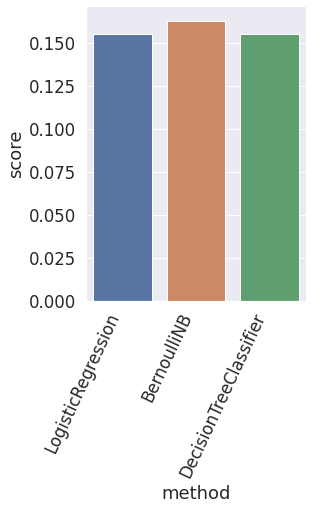

In [20]:
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.datasets import make_classification
# X, y = make_classification(n_samples=100, n_features=4,
#                             n_informative=2, n_redundant=0,
#                             random_state=0, shuffle=False)

# clf = BaggingClassifier(base_estimator=SVC(),
#                          n_estimators=10, random_state=0).fit(X, y)


# Зададим параметры решающего дерева
dtc = DecisionTreeClassifier(criterion="entropy", min_samples_split=50)
bag_model=BaggingClassifier(base_estimator=dtc, n_estimators=100, bootstrap=True)
bag_model=bag_model.fit(X_train, y_train)
y_test_pred=bag_model.predict(X_test) # предсказание
print(bag_model.score(X_test, y_test))
# print(confusion_matrix(y_test, y_test_pred)) 

# Используем разные методы
lr = LogisticRegression();
bnb = BernoulliNB()
# gnb = GaussianNB()

base_methods=[lr, bnb, dtc] #gnb, 
scores = []
output_method_names = []

# Пройдёмся по разным методам и отобразим из точность
for bm  in base_methods:
 print("\nМетод: ", bm)
 bag_model=BaggingClassifier(base_estimator=bm, n_estimators=100, bootstrap=True)
 bag_model=bag_model.fit(X_train, y_train)
 y_test_pred=bag_model.predict(X_test)
 print('\n',classification_report(y_test, y_test_pred))
 model_score = bag_model.score(X_test, y_test)
 print('Score: ', model_score)
 scores.append(model_score)

#  print(confusion_matrix(y_test, y_test_pred)) 

for bm in base_methods:
  name, _ = str(bm).split('(')
  output_method_names.append(name)

scores_df = pd.DataFrame(list(zip(output_method_names, scores)), 
                         columns=['method', 'score'])

print(scores_df) #Наш датафрейм для красивого отображения
    
# Отобразим график алгоритма к его оценке
chart = sns.catplot(x='method', y='score', kind="bar", data=scores_df);

chart.set_xticklabels(rotation=65, horizontalalignment='right')


### Как можем наблюдать все ветоды имеют близкие значения, но Бернули регрессор чуть вырывается вперёд

# Реализуем подход с использованием случайного леса

In [21]:
# Импорт модели, которую будем использовать
from sklearn.ensemble import RandomForestRegressor
# Инстанциируем модель с 1000 деревьями решений
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Натренируем модель на train данных
rf.fit(X_train, y_train);

In [22]:
# Используем метод предсказания 'леса' на тестовых данных
predictions = rf.predict(X_test)
# Высчитаем абсолютные ошибки
errors = abs(predictions - y_test)
# Высчитаем среднюю абсолютную ошибку (mae)
print('Average Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Average Absolute Error: 18.2 degrees.


In [23]:
# Высчитаем среднюю абсолютную ошибку (MAPE)
mape = 100 * (errors / y_test)
# Высчитаем и отобразим точность
accuracy = 100 - np.mean(mape)
print(mape)
print(accuracy)
# Выкинем nan
print('Accuracy:', round(accuracy, 2), '%.')

[8.20500000e+01 9.50000000e+00 1.98000000e+00            inf
 1.10088889e+02 4.38666667e+01 5.77066667e+01 2.24388889e+01
 2.26482143e+01 1.17300000e+03 1.85850000e+01 1.38980392e+01
 6.97000000e+01 2.53090909e+01 3.33000000e+01 1.86666667e+00
 1.06900000e+02 3.39000000e+01 5.44000000e+01 6.63000000e+01
 7.40000000e+00 7.58333333e+00 3.39000000e+01 5.23239437e-01
 7.55000000e+01 1.66018100e+01 2.61000000e+02 2.73600000e+01
 4.20769231e+00 2.08714286e+01 2.57420290e+01 1.09000000e+01
 7.38200000e+02 5.01155556e+02 6.15300000e+02 1.66840000e+03
 1.50000000e+00 8.76666667e+00 8.31796610e+01 2.86500000e+01
 9.13272727e+00 1.30750000e+01 2.39517857e+01 1.60800000e+00
 8.23600000e+01 2.07500000e+01 3.86655859e+01 7.35750000e+01
 1.26437500e+01 9.34703704e+01 1.90000000e+00 1.44400000e+02
 1.81666667e+00 1.04142857e+01 1.22745833e+02            inf
 3.65000000e+01 2.36666667e+00 1.77225865e+01 7.21800000e+01
 1.82000000e+01 1.24500000e+02 1.36350000e+02 2.30000000e+01
 9.17500000e+00 1.088000

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  


In [24]:
from sklearn.ensemble import RandomForestRegressor
# from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

regressor = RandomForestRegressor(n_estimators=1200, random_state=100)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

errors = abs(y_pred - y_test)
# Отобразим обученную на расширенных данных
print('Average absolute error: ', round(np.mean(errors), 2), 'degrees.')
print('Mean Asolute Percentage Error')
mape = np.mean(100 * (errors / y_test))


# Отобразим наши метрики
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

# print(confusion_matrix(y_test,y_pred))
# print(classification_report(y_test,y_pred))
# print(accuracy_score(y_test, y_pred))

Average absolute error:  18.62 degrees.
Mean Asolute Percentage Error
Mean Absolute Error: 18.623171834625325
Mean Squared Error: 11249.154811740958
Root Mean Squared Error: 106.06203284748486


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in true_divide
  if sys.path[0] == '':


# Построим knn классификатор

In [25]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Объявем кнн классификатор
knn = KNeighborsClassifier()
knn_grid = {'n_neighbors': np.array(np.linspace(1, 60), dtype='int')} 

#Зададим параметры кросс валидации
gs = GridSearchCV(knn, knn_grid, cv=24)
gs.fit(X, y)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=24.
  % (min_groups, self.n_splits)), UserWarning)


GridSearchCV(cv=24, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  7,  8,  9, 10, 11, 13, 14, 15, 16, 17, 19, 20,
       21, 22, 23, 25, 26, 27, 28, 29, 31, 32, 33, 34, 35, 37, 38, 39, 40,
       41, 43, 44, 45, 46, 47, 49, 50, 51, 52, 53, 55, 56, 57, 58, 60])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [26]:
# Зададим функцию отрисовки
def grid_plot(x, y, x_label, title, y_label='roc_auc'):
    plt.figure(figsize=(12, 6))
    plt.grid(True)
    plt.plot(x, y, 'go-')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)

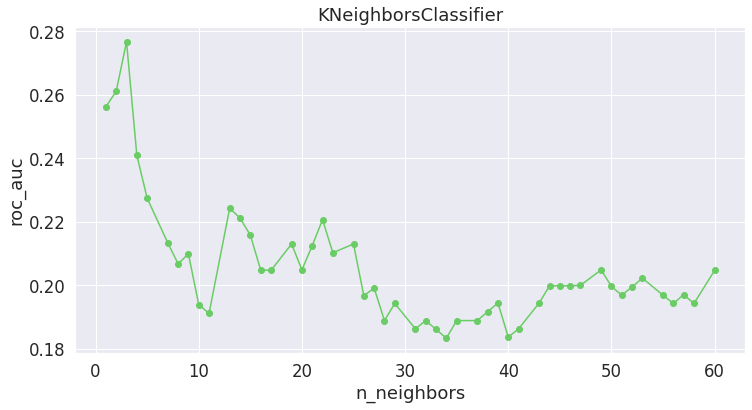

In [27]:
grid_plot(knn_grid['n_neighbors'], gs.cv_results_['mean_test_score'], 'n_neighbors', 'KNeighborsClassifier')

In [28]:
print(gs.best_params_, gs.best_score_)

{'n_neighbors': 3} 0.2767361111111111


In [29]:
knn = KNeighborsClassifier(n_neighbors=3) #gs.best_model
clf_knn = knn.fit(X_train, y_train)

y_knn = clf_knn.predict(X_test)
y_knn

array([2.000e+00, 6.000e+00, 2.000e+00, 0.000e+00, 5.000e+00, 2.000e+00,
       8.000e+00, 6.000e+00, 3.500e+01, 2.000e+00, 3.900e+01, 3.600e+01,
       1.000e+00, 6.000e+00, 1.000e+00, 1.000e+01, 1.000e+00, 1.000e+00,
       1.000e+00, 1.000e+00, 1.000e+00, 3.300e+01, 1.000e+00, 1.080e+02,
       2.000e+00, 2.060e+02, 1.000e+00, 1.000e+00, 8.000e+00, 7.000e+00,
       3.600e+01, 1.000e+00, 0.000e+00, 5.000e+00, 2.000e+00, 5.000e+00,
       1.000e+00, 1.000e+00, 4.300e+01, 3.000e+00, 2.700e+01, 4.000e+00,
       1.000e+02, 1.000e+02, 0.000e+00, 1.000e+00, 1.052e+03, 1.000e+00,
       3.300e+01, 0.000e+00, 6.000e+00, 1.000e+00, 6.000e+00, 1.300e+01,
       9.000e+00, 3.000e+00, 1.000e+00, 3.000e+00, 5.300e+01, 8.000e+00,
       1.000e+00, 1.000e+00, 0.000e+00, 2.000e+00, 1.000e+00, 1.000e+00,
       3.000e+00, 2.000e+01, 1.000e+00, 1.900e+01, 1.000e+01, 2.300e+01,
       5.000e+00, 3.300e+01, 0.000e+00, 1.000e+00, 6.000e+00, 6.000e+00,
       2.000e+01, 1.700e+01, 0.000e+00, 4.000e+00, 

In [30]:
print ('knn =', metrics.accuracy_score(y_test, y_knn), '\n')
print(metrics.classification_report(y_test, y_knn))

knn = 0.1937984496124031 

              precision    recall  f1-score   support

         0.0       0.11      0.33      0.17         3
         1.0       0.37      0.59      0.46        22
         2.0       0.25      0.19      0.21        16
         3.0       0.25      0.20      0.22         5
         4.0       0.25      0.10      0.14        10
         5.0       0.00      0.00      0.00         5
         6.0       0.17      0.33      0.22         6
         7.0       0.67      0.40      0.50         5
         8.0       0.00      0.00      0.00         2
         9.0       0.33      0.25      0.29         4
        10.0       0.00      0.00      0.00         1
        11.0       0.00      0.00      0.00         2
        12.0       0.00      0.00      0.00         2
        13.0       0.00      0.00      0.00         1
        14.0       0.00      0.00      0.00         1
        15.0       0.00      0.00      0.00         4
        16.0       0.00      0.00      0.00         1


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [31]:
# Параметры f1 метрики
print('macro = ', metrics.f1_score(y_test, y_knn, average='macro'), ', micro = ', metrics.f1_score(y_test, y_knn, average='micro'))

macro =  0.04566309954781133 , micro =  0.1937984496124031


### Точность довольно слабая

# Преступим к нейросетевому подходу

In [ ]:
!pip install git+git://github.com/keras-team/keras.git --upgrade --no-deps

  Cloning git://github.com/keras-team/keras.git to /private/var/folders/z6/tnsj6yl12dl3fz942rdsfbk00000gn/T/pip-req-build-79ctl2fm
  Running command git clone -q git://github.com/keras-team/keras.git /private/var/folders/z6/tnsj6yl12dl3fz942rdsfbk00000gn/T/pip-req-build-79ctl2fm
    ERROR: Command errored out with exit status 1:
     command: /Users/michaelsalamakha/opt/anaconda3/bin/python -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'/private/var/folders/z6/tnsj6yl12dl3fz942rdsfbk00000gn/T/pip-req-build-79ctl2fm/setup.py'"'"'; __file__='"'"'/private/var/folders/z6/tnsj6yl12dl3fz942rdsfbk00000gn/T/pip-req-build-79ctl2fm/setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' egg_info --egg-base /private/var/folders/z6/tnsj6yl12dl3fz942rdsfbk00000gn/T/pip-req-build-79ctl2fm/pip-egg-info
         cwd: /private/var/folders/z6/tnsj6yl12dl3fz942rdsfbk00000gn/T/p

In [32]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow.compat.v1 as tf
from tensorflow import keras
from tensorflow.keras import layers

from keras.models import Sequential
from keras.layers import Dense


tf.keras.backend.clear_session()  # Для чистого/простого сброса состояния notebook.

In [34]:
tf.disable_v2_behavior()

#настройка tf конфига
config = tf.ConfigProto(
    device_count={'GPU': 1},
    intra_op_parallelism_threads=1,
    allow_soft_placement=True
)

config.gpu_options.allow_growth = True
config.gpu_options.per_process_gpu_memory_fraction = 0.6

session = tf.Session(config=config)

tf.keras.backend.set_session(session)


In [35]:
# Подготовим данные для модели
inputs = keras.Input(shape=(6), name='digits')
x = layers.Dense(64, activation='relu', name='dense_1')(inputs)
x = layers.Dense(64, activation='relu', name='dense_2')(x)
outputs = layers.Dense(12000, activation='softmax', name='predictions')(x)

# Поместим данные в модель
model = keras.Model(inputs=inputs, outputs=outputs)


In [36]:
print(X,'\n\n', X.shape)

[[ 0.8220266   1.03580882 -1.63468018 -0.12781757  1.24352908 -0.14287595]
 [-0.6925677  -1.65076663 -1.63468018 -0.12781757 -0.42966544 -0.14287595]
 [-0.7614129  -1.65076663 -1.63468018 -0.12781757 -0.56909832 -0.14287595]
 ...
 [ 0.40895543  0.08760572  1.51898853 -0.12781757  0.1977825  -0.14287595]
 [ 0.27126504 -0.86059738  1.51898853 -0.12781757 -0.70853119 -0.14287595]
 [-1.72524563  0.08760572  1.51898853 12.18992389 -0.63881475 11.8632035 ]] 

 (368, 6)


In [37]:
# Специфицируем обучающую конфигурацию метрики, потери, оптимизатор
model.compile(optimizer=keras.optimizers.RMSprop(),  # Optimizer
              # Loss function to minimize
              loss=keras.losses.SparseCategoricalCrossentropy(),
              # List of metrics to monitor
              metrics=[keras.metrics.SparseCategoricalAccuracy()])

# Train the model by slicing the data into "batches"
# of size "batch_size", and repeatedly iterating over
# the entire dataset for a given number of "epochs"
print('# Fit model on training data')
# history = model.fit(X_train, y_train,
#                     batch_size=64,
#                     epochs=3,
                    # Добавил валидацию для мониторинга потерь и метрик в конце эпох
                    # validation_data=(x_val, y_val))
history = model.fit(x=X, y=y, batch_size=None, epochs=1,
                   verbose=1, callbacks=None, validation_split=0.0,
                   validation_data=None, shuffle=True, class_weight=None, 
                   sample_weight=None, initial_epoch=0, steps_per_epoch=None, 
                   validation_steps=None, validation_freq=1, max_queue_size=10,
                   workers=1, use_multiprocessing=False)


# Возвращённый объект "Истории" имеет записи значний
# потерь и метрики значения в ходе обучения
print('\nhistory dict:', history.history)

# Оценим модель на тестовых данных используя `evaluate`
print('\n# Evaluate on test data')
results = model.evaluate(X, y, batch_size=128)
print('test loss, test acc:', results)

# Генерируем предсказания (вероятность -- вывод последнего слоя)
# используем `predict` на новых данных
print('\n# Generate predictions for 3 samples')
predictions = model.predict(X_test[:4])
print('predictions shape:', predictions.shape)


# Fit model on training data
Train on 368 samples
368/368 [==============================] - 0s 590us/sample - loss: 9.2533 - sparse_categorical_accuracy: 0.0788

history dict: {'loss': [9.253332552702531], 'sparse_categorical_accuracy': [0.07880435]}

# Evaluate on test data
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
test loss, test acc: [8.94314778369406, 0.12228261]

# Generate predictions for 3 samples
predictions shape: (4, 12000)


In [38]:
model = Sequential()
model.add(Dense(12, input_dim=6, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# скомпилируем keras model
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])  #binary_crossentropy
# model.compile(loss='mean_squared_error', optimizer='sgd', metrics=['accuracy'])


In [39]:
# Скормим keras модели наши данные

X_train_keras, X_test_keras, y_train_keras, y_test_keras = train_test_split(X, y, test_size=0.35, random_state=42)
model.fit(X_train_keras, y_train_keras, epochs=40, batch_size=10) # Сделаем колличество эпох обучения 400 что бы лучше обучить модель

Train on 239 samples
Epoch 1/40
239/239 [==============================] - 0s 94us/sample - loss: 276900.1257 - acc: 0.0460
Epoch 2/40
239/239 [==============================] - 0s 95us/sample - loss: 276861.2482 - acc: 0.0711
Epoch 3/40
239/239 [==============================] - 0s 93us/sample - loss: 276821.9613 - acc: 0.1172
Epoch 4/40
239/239 [==============================] - 0s 100us/sample - loss: 276795.9845 - acc: 0.1297
Epoch 5/40
239/239 [==============================] - 0s 96us/sample - loss: 276790.1139 - acc: 0.1297
Epoch 6/40
239/239 [==============================] - 0s 94us/sample - loss: 276785.7936 - acc: 0.1339
Epoch 7/40
239/239 [==============================] - 0s 92us/sample - loss: 276782.5715 - acc: 0.1799
Epoch 8/40
239/239 [==============================] - 0s 92us/sample - loss: 276779.5512 - acc: 0.1967
Epoch 9/40
239/239 [==============================] - 0s 106us/sample - loss: 276777.1172 - acc: 0.1967
Epoch 10/40
239/239 [=============================

In [40]:
# Отобразим точность модели
_, accuracy = model.evaluate(X, y)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 19.57


Воспользуемся другой моделью

In [ ]:
model = Sequential([
  Dense(32, activation='relu', input_shape=(6,)), # , kernel_initializer='normal'
  Dense(32, activation='relu'),
  Dense(1, activation='sigmoid'),
])

In [ ]:
# Скомпилируем модель
model.compile(optimizer='adam', #sgd
              loss='mean_squared_error', #binary_crossentropy
              metrics=['accuracy'])

In [ ]:
X_val, X_val_test, y_val, y_val_test = train_test_split(X_test, y_test, test_size=0.5)
print(X_train.shape, X_val_test.shape, X_test.shape, y_train.shape, y_val.shape, y_val_test.shape)
# print(X_val, X_val.shape, y_val, y_val.shape)

(239, 6) (65, 6) (129, 6) (239,) (64,) (65,)


In [ ]:
# from keras.wrappers.scikit_learn import KerasRegressor
# from sklearn.model_selection import KFold, cross_val_score

# estimator = KerasRegressor(build_fn=model, epochs=120, batch_size=5, verbose=0)
# folds = KFold(n_splits=10)
# result = cross_val_score(estimator, X, y, cv=folds)
# print(f'Baseline: {result.mean()},   {result.std()}')

In [ ]:
hist = model.fit(X_train, y_train,
          batch_size=32, epochs=120,
          validation_data=(X_val, y_val))

Train on 239 samples, validate on 64 samples
Epoch 1/120
239/239 [==============================] - 0s 493us/step - loss: 211292.9834 - accuracy: 0.0335 - val_loss: 6328.6558 - val_accuracy: 0.0625
Epoch 2/120
239/239 [==============================] - 0s 71us/step - loss: 211276.7961 - accuracy: 0.1130 - val_loss: 6325.5667 - val_accuracy: 0.1094
Epoch 3/120
239/239 [==============================] - 0s 70us/step - loss: 211250.2512 - accuracy: 0.2008 - val_loss: 6322.9735 - val_accuracy: 0.1562
Epoch 4/120
239/239 [==============================] - 0s 83us/step - loss: 211240.2593 - accuracy: 0.2092 - val_loss: 6320.1572 - val_accuracy: 0.1562
Epoch 5/120
239/239 [==============================] - 0s 74us/step - loss: 211228.1512 - accuracy: 0.2092 - val_loss: 6317.7509 - val_accuracy: 0.1562
Epoch 6/120
239/239 [==============================] - 0s 66us/step - loss: 211222.2586 - accuracy: 0.2092 - val_loss: 6315.3094 - val_accuracy: 0.1562
Epoch 7/120
239/239 [=====================

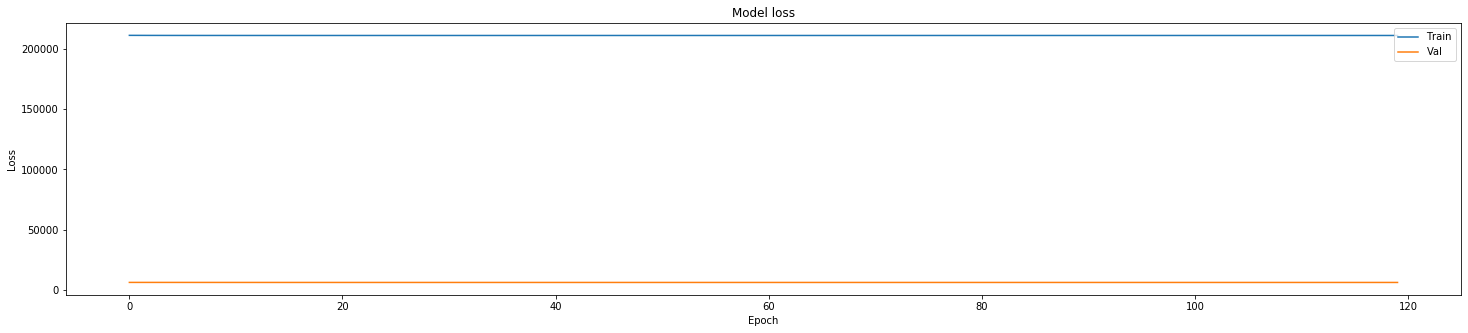

In [ ]:
# отобразим график loss у нашей сети
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.rcParams['figure.figsize'] = [25, 5]
plt.show()

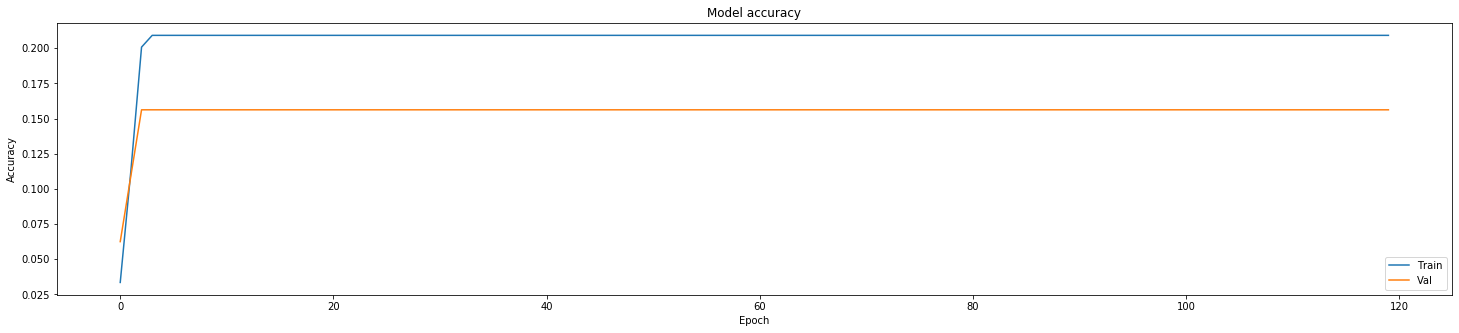

In [ ]:
# график точности
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.rcParams['figure.figsize'] = [25, 5]
plt.show()

Точность второй модели повысилась на пару процентов.



Воспользуемся XGBoost

In [ ]:
import xgboost as xgb
# read in data
# dtrain = xgb.DMatrix(X_train)
# dtest = xgb.DMatrix(X_test)
# # specify parameters via map
# param = {'max_depth':12, 'eta':1, 'objective':'binary:logistic' }
# num_round = 2
# bst = xgb.train(param, dtrain, num_round)
# # make prediction
# preds = bst.predict(dtest)


xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 12, alpha = 10, n_estimators = 10)

In [ ]:
xg_reg.fit(X_train,y_train)

[10:28:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.3, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=12, min_child_weight=1, missing=None, n_estimators=10,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [ ]:
preds = xg_reg.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 332.765108


In [ ]:
data_dmatrix = xgb.DMatrix(data=X,label=y)

params = {"objective":"reg:linear",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 12, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)

cv_results.head() # Выведем результаты по 5 фолдам кросс валидации

[10:33:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:33:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:33:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,420.545980,100.327520,367.934947,246.710320
1,396.726898,91.935006,351.814842,238.230632
2,386.154653,89.160385,343.247043,238.366909
3,372.238851,85.179947,332.453728,237.143840
4,360.652883,89.923304,316.287245,227.357972


In [ ]:
print((cv_results["test-rmse-mean"]).tail(1))

49    188.595968
Name: test-rmse-mean, dtype: float64


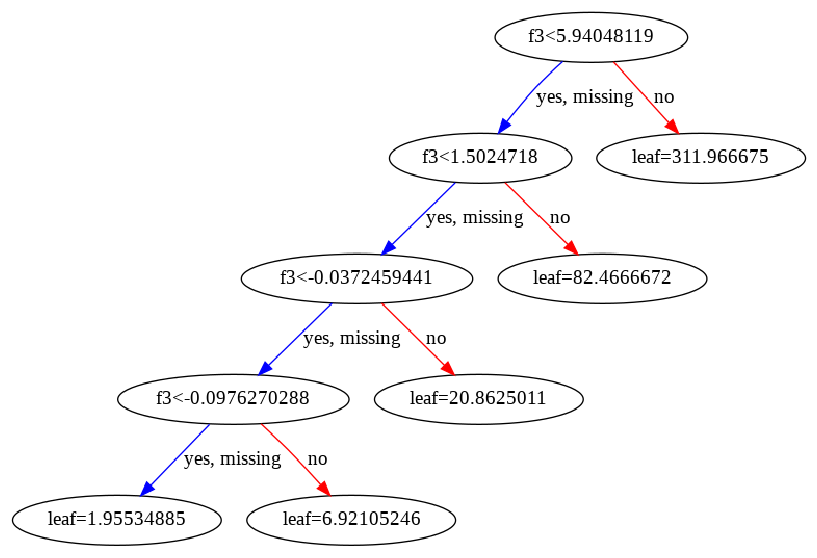

In [ ]:
# Визуализируем

import matplotlib.pyplot as plt

xgb.plot_tree(xg_reg,num_trees=0)
plt.rcParams['figure.figsize'] = [100, 10]
plt.show()

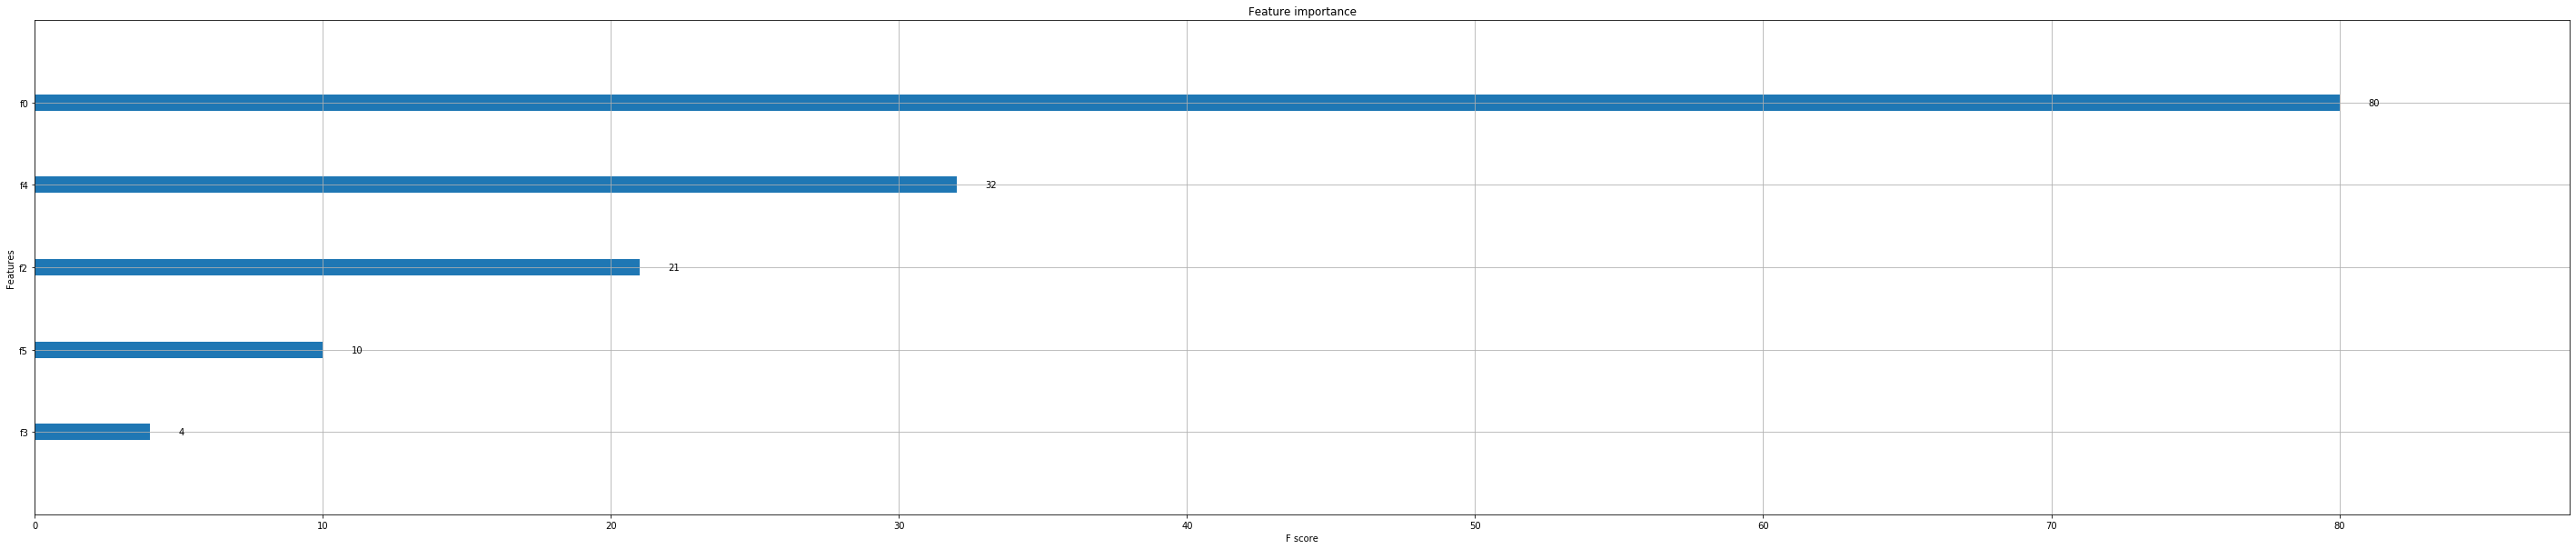

In [ ]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()